In [87]:
import os
import glob
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import IncrementalPCA
%matplotlib inline
 
np.random.seed(5)
print("Init done.")

Init done.


In [88]:
cd C:\Users\SG\Downloads\Solar_Panel_Soiling_Image_dataset\PanelImages

C:\Users\SG\Downloads\Solar_Panel_Soiling_Image_dataset\PanelImages


In [106]:
# リソースディレクトリの設定、配列追加
img_paths = []
files = glob.glob(".\*.jpg")
#files = glob.glob(".\*.png")
img_paths.extend(files)
img_num = len(img_paths)
print("Image number:", img_num)
print("Image list make done.")

Image number: 45754
Image list make done.


In [107]:
def masked(x,y,xy1,xy2,xy3,xy4):
    #mask_back2 = np.zeros_like(fg_img)
    mask_back2 = np.zeros([x,y,3])
    pts = np.array([xy1,xy2,xy3,xy4])
    #pts = np.array([(192,33),(79,18),(13,140),(192,170)])
    mask_back2 = cv2.fillPoly(mask_back2, pts = [pts], color =(255,255,255))
    mask_back2 = mask_back2 // 255
    return np.asarray(mask_back2).astype(np.uint8)

mask_back2 = masked(192,192,(192,33),(79,18),(13,140),(192,170))
#mask_back2 = masked(192,192,(0,0),(79,18),(13,140),(192,170))

# plt.imshow(mask_back2, cmap = "gray")
# plt.show()

(192, 192)
Size Check done.


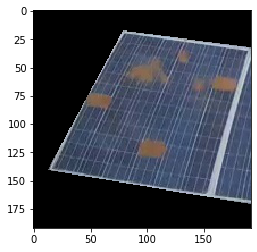

In [108]:
# イメージサイズの取得
img = Image.open(img_paths[0])
print(img.size)
plt.figure()
plt.imshow(np.asarray(img)*mask_back2.astype(np.uint8))
#plt.imshow(cv2.bitwise_and(np.asarray(img),mask_back2))
print("Size Check done.")

In [109]:
# np.asarray(img)[mask_back2==1].shape

In [110]:
# imgサイズの調整・配列に追加
plt.close("all")
#img_paths = img_paths[:600]
img_paths = [img_paths[i] for i in range(0,len(img_paths),10)]
print(len(img_paths))

def img_to_matrix(img):
    img_array = np.asarray(img)
    return img_array
def flatten_img(img_array):    
    s = img_array.shape[0] * img_array.shape[1] * img_array.shape[2]
    img_width = img_array.reshape(1, s)
    return img_width[0]

np.asarray(img)*mask_back2.astype(np.uint8)

dataset = []
for i in img_paths:
    img = Image.open(i)
    img = np.asarray(img)*mask_back2.astype(np.uint8)
    img = Image.fromarray(img)
    #img = img.resize((int(80), int(60)), Image.BICUBIC)
    img = img_to_matrix(img)
    img = flatten_img(img)
    dataset.append(img)

dataset = np.array(dataset)
print(dataset.shape)
print("Dataset make done.")

4576
(4576, 110592)
Dataset make done.


In [111]:
# 次元数の圧縮
# 
# batch_size < len(dataset) && n_components < batch_size である必要がある
n = dataset.shape[0]
#batch_size = img_num
batch_size = 4576
ipca = IncrementalPCA(n_components=batch_size-1)
for i in range(n//batch_size):
    r_dataset = ipca.partial_fit(dataset[i*batch_size:(i+1)*batch_size])
r_dataset = ipca.transform(dataset)
print(r_dataset.shape)
print("PCA done.")
print("PCA累積寄与率: {}".format(sum(pca.explained_variance_ratio_)))

(4576, 4575)
PCA done.
PCA累積寄与率: 0.9999999999999997


In [19]:
output_path = r"C:\Users\SG\Downloads\Solar_Panel_Soiling_Image_dataset"
# K-means によるクラスタリング
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=5).fit(r_dataset)
labels = kmeans.labels_
print("K-means clustering done.")

for i in range(n_clusters):
    label = np.where(labels==i)[0]
    # Image placing
    if not os.path.exists(output_path+"/img_"+str(i)):
        os.makedirs(output_path+"/img_"+str(i))
    for j in label:
        img = Image.open(img_paths[j])
        fname = img_paths[j].split('/')[-1]
        img.save(output_path+"/img_"+str(i)+"/" + fname)
print("Image placing done.")

K-means clustering done.
Image placing done.


In [23]:
# ライブラリ読み込み・初期化
# -*- coding: utf-8 -*-
import os
import glob
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
%matplotlib inline
 
# x-means用
from pyclustering.cluster.xmeans import xmeans, kmeans_plusplus_initializer
from pyclustering.utils import draw_clusters
np.random.seed(5)
print("Init done.")

Init done.


In [112]:
# np配列から通常配列を取得
points = r_dataset.tolist()
#points = dataset.tolist()

# クラスタ数2から探索させてみる
initial_centers = kmeans_plusplus_initializer(points, 2).initialize()
# クラスタリングの実行
instances = xmeans(points, initial_centers, ccore=True)
instances.process()
# クラスタはget_clustersで取得できる
clusters = instances.get_clusters()
# 最適クラスタサイズを取得
cluster_size = len(clusters)
print("Cluster Size: " + str(cluster_size))

Cluster Size: 20


In [113]:
# K-means によるクラスタリング
# n_clusters = 5
output_path = r"C:\Users\SG\Downloads\Solar_Panel_Soiling_Image_dataset\x_means3"
# K-means によるクラスタリング
n_clusters = cluster_size
kmeans = KMeans(n_clusters=n_clusters, random_state=5).fit(r_dataset)
labels = kmeans.labels_
print("K-means clustering done.")

for i in range(n_clusters):
    label = np.where(labels==i)[0]
    # Image placing
    if not os.path.exists(output_path+"/img_"+str(i)):
        os.makedirs(output_path+"/img_"+str(i))
    for j in label:
        img = Image.open(img_paths[j])
        fname = img_paths[j].split('/')[-1]
        img.save(output_path+"/img_"+str(i)+"/" + fname)
print("Image placing done.")

K-means clustering done.
Image placing done.


In [32]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(np.cumsum(pca.explained_variance_ratio_)[::-1][0])

0.9999999999999997


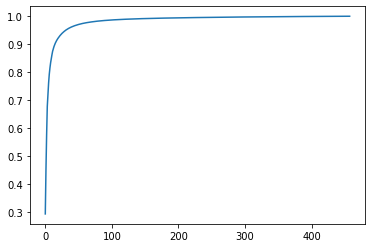

In [33]:
accumulated_ratio_ = np.add.accumulate(pca.explained_variance_ratio_)
plt.plot(accumulated_ratio_)